In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv('C:/Users/Sayan Mondal/Downloads/medical_cost_insurance.csv')


In [5]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

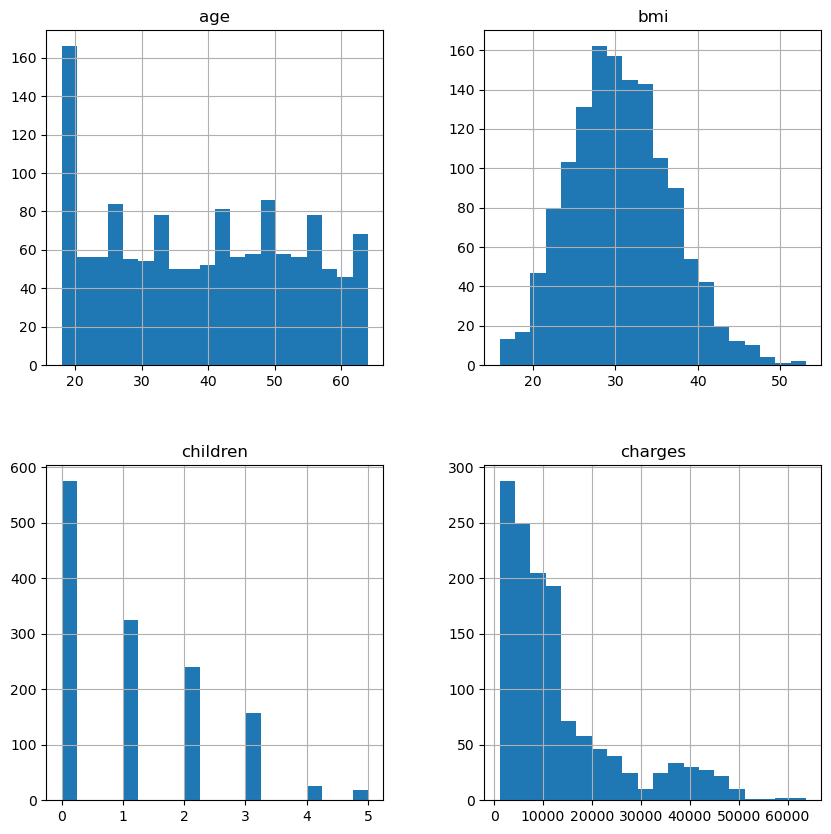

In [9]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

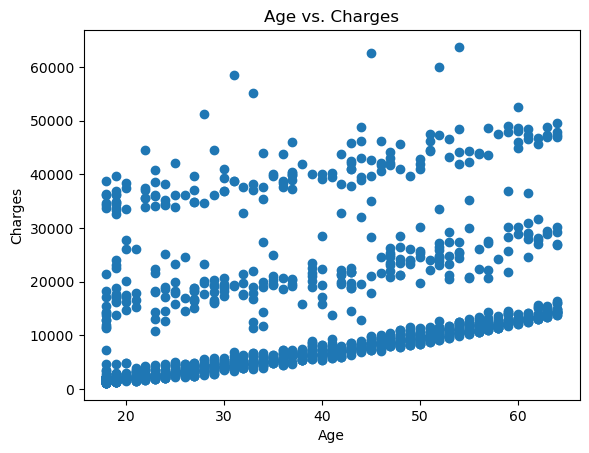

In [10]:
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()


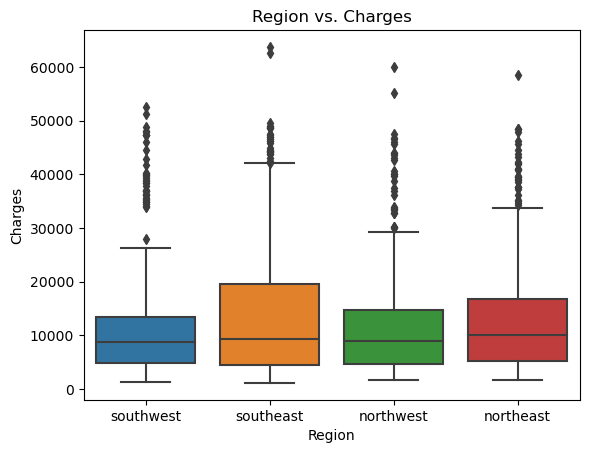

In [11]:
sns.boxplot(x='region', y='charges', data=df)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()


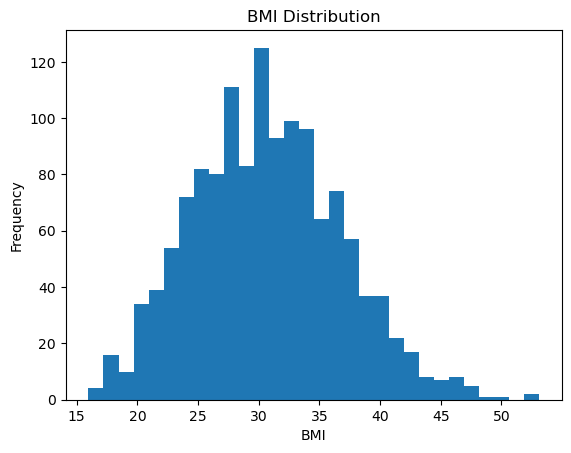

In [12]:
plt.hist(df['bmi'], bins=30)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()


In [13]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [14]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
y_pred = model.predict(X_test)
print(X_test)
print(y_pred)
r2_score = model.score(X_test,y_test)
print(r2_score*100,'%')
# Create an instance of the model
model = LinearRegression(fit_intercept=True)

# Train the model
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
764    45  25.175         2         0           0                 0   
887    36  30.020         0         0           0                 1   
890    64  26.885         0         0           1                 1   
1293   46  25.745         3         1           0                 1   
259    19  31.920         0         1           1                 1   
...   ...     ...       ...       ...         ...               ...   
109    63  35.090         0         1           1                 0   
575    58  27.170         0         0           0                 1   
535    38  28.025         1         1           0                 0   
543    54  47.410         0         0           1                 0   
846    51  34.200         1         0           0                 0   

      region_southeast  region_southwest  
764                  0                 0  
887                  0                 0  
890               

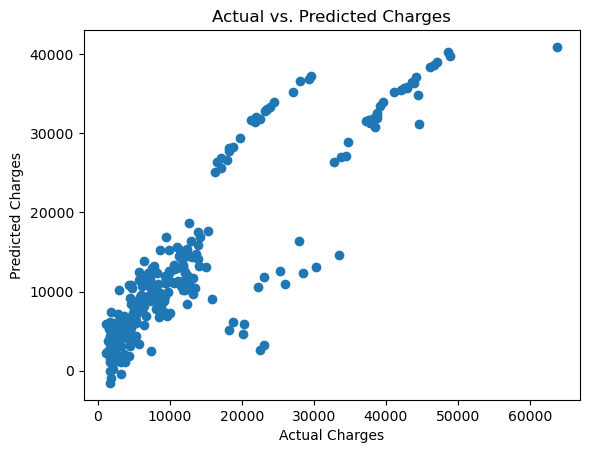

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


R-squared: 0.7835929767120724
